# Accessing ICESat-2 Data

```{admonition} Learning Objectives
* Use `icepyx` to search, download, and read ICESat-2 granules
* Use `sliderule` to get GeoDataFrames of ICESat-2 data
* Use `h5coro` to directly read ICESat-2 granules in an S3 bucket
```

## Part 1: icepyx

![icepyx logo](icepyx_logo_medium.png)

`icepyx` is a community and software library for searching, downloading, and reading ICESat-2 data. While opening data should be straightforward, there are some oddities in navigating the highly nested organization and hundreds of variables of the ICESat-2 data. `icepyx` provides tools to help with those oddities.

`icepyx` was started and initially developed by Jessica Scheick to provide easy programmatic access to ICESat-2 data (before `earthaccess` existed!) and facilitate collaborative development around ICESat-2 data products, including training, skill building, and support around practicing open science and contributing to open-source software. Thanks to contributions from countless community members, `icepyx` can (for ICESat-2 data):

* search for available data granules (data files)

* order and download data or access it directly in the cloud

* order a subset of data: clipped in space, time, containing fewer variables, or a few other options provided by NSIDC

* search through the available ICESat-2 data variables

* read ICESat-2 data into xarray DataArrays, including merging data from multiple files

Under the hood, `icepyx` relies on `earthaccess` to help handle authentication, especially for obtaining S3 tokens to access ICESat-2 data in the cloud. All this happens without the user needing to take any action other than supplying their Earthdata Login credentials using one of the methods described in the earthaccess tutorial.

#### Credit

This part of the notebook is based on an icepyx Tutorial originally created by Rachel Wegener, Univ. Maryland and updated by Amy Steiker, NSIDC, and Jessica Scheick, Univ. of New Hampshire. It was updated in May 2024 to utilize (at a minimum) v1.0.0 of icepyx.

For the original notebook, which includes additional examples and information, see: https://book.cryointhecloud.com/tutorials/NASA-Earthdata-Cloud-Access/4.icepyx.html

#### For more information

***GitHub***: https://github.com/icesat2py/icepyx  
***Documentation***: https://icepyx.readthedocs.io/en/latest/

#### Prerequisites

* An Earth Data Login account.
* A .netrc file, that contains your Earthdata Login credentials, in your home directory.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
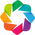

In [1]:
import icepyx as ipx

In [2]:
import json
import math
import warnings

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from shapely.geometry import shape, GeometryCollection

### Example 1: Search and Download ATL08 Granule

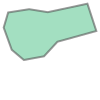

In [3]:
# Open a geojson of our area of interest
with open("./grandmesa.geojson") as f:
    features = json.load(f)["features"]

grandmesa = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])
grandmesa

In [4]:
# Use our search parameters to setup a search Query
short_name = 'ATL08'
spatial_extent = list(grandmesa.bounds)
date_range = ['2019-12-01','2019-12-12']
region = ipx.Query(short_name, spatial_extent, date_range)

In [5]:
# Display if any data files, or granules, matched our search
region.avail_granules(ids=True)

[['ATL08_20191211143520_11560506_006_01.h5']]

In [6]:
# We can also get the S3 urls
print(region.avail_granules(ids=True, cloud=True))
s3urls = region.avail_granules(ids=True, cloud=True)[1]

[['ATL08_20191211143520_11560506_006_01.h5'], ['s3://nsidc-cumulus-prod-protected/ATLAS/ATL08/006/2019/12/11/ATL08_20191211143520_11560506_006_01.h5']]


In [7]:
# Download the granules to a into a folder called 'bosque_primavera_ATL08'
region.download_granules('/tmp/grandmesa_ATL08')

Total number of data order requests is  1  for  1  granules.
Data request  1  of  1  is submitting to NSIDC
order ID:  5000005727224
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is: complete
Beginning download of zipped output...
Data request 5000005727224 of  1  order(s) is downloaded.
Download complete


### Example 2: Reading a Granule with icepyx

To read a file with icepyx there are several steps:

1. Create a `Read` object. This sets up an initial connection to your file(s) and validates the metadata.
2. Tell the `Read` object what variables you would like to read
3. Load your data!

#### Create a `Read` object

In [8]:
# access the file you've downloaded
reader = ipx.Read('/tmp/grandmesa_ATL08')
reader

#### Explore your variables

In [9]:
reader.vars.avail()

['ancillary_data/atlas_sdp_gps_epoch',
 'ancillary_data/control',
 'ancillary_data/data_end_utc',
 'ancillary_data/data_start_utc',
 'ancillary_data/end_cycle',
 'ancillary_data/end_delta_time',
 'ancillary_data/end_geoseg',
 'ancillary_data/end_gpssow',
 'ancillary_data/end_gpsweek',
 'ancillary_data/end_orbit',
 'ancillary_data/end_region',
 'ancillary_data/end_rgt',
 'ancillary_data/granule_end_utc',
 'ancillary_data/granule_start_utc',
 'ancillary_data/land/atl08_region',
 'ancillary_data/land/bin_size_h',
 'ancillary_data/land/bin_size_n',
 'ancillary_data/land/bright_thresh',
 'ancillary_data/land/ca_class',
 'ancillary_data/land/can_noise_thresh',
 'ancillary_data/land/can_stat_thresh',
 'ancillary_data/land/canopy20m_thresh',
 'ancillary_data/land/canopy_flag_switch',
 'ancillary_data/land/canopy_seg',
 'ancillary_data/land/class_thresh',
 'ancillary_data/land/cloud_filter_switch',
 'ancillary_data/land/del_amp',
 'ancillary_data/land/del_mu',
 'ancillary_data/land/del_sigma',


Thats ***a lot*** of variables!

One key feature of `icepyx` is the ability to browse the variables available in the dataset. There are typically hundreds of variables in a single dataset, so that is a lot to sort through! Let’s take a moment to get oriented to the organization of ATL08 variables, by first a few important pieces of the algorithm.

1. To create higher level variables like canopy or terrain height, the ATL08 algorithms goes through a series of steps:

2. Identify signal photons from noise photons

3. Classify each of the signal photons as either terrain, canopy, or canopy top

4. Remove elevation, so the heights are with respect to the ground

5. Group the signal photons into 100m segments. If there are a sufficient number of photons in that group, calculate statistics for terrain and canopy (ex. mean height, max height, standard deviation, etc.)

![ATL08 Photon Classification Example](ATL08_photon_classification_example.jpg)

> Fig. 4. An example of the classified photons produced from the ATL08 algorithm. Ground photons (red dots) are labeled as all photons falling within a point spread function distance of the estimated ground surface. The top of canopy photons (green dots) are photons that fall within a buffer distance from the upper canopy surface, and the photons that lie between the top of canopy surface and ground surface are labeled as canopy photons (blue dots). (Neuenschwander & Pitts, 2019)

![ATL08 Structure](ATL08_structure.png)

#### Load your variables

In [10]:
reader.vars.append(var_list=['h_canopy', 'latitude', 'longitude'])
ds = reader.load()
ds

<xarray.Dataset> Size: 171kB
Dimensions:              (gran_idx: 1, photon_idx: 1852, spot: 6)
Coordinates:
  * gran_idx             (gran_idx) float64 8B 1.156e+05
  * photon_idx           (photon_idx) int64 15kB 0 1 2 3 ... 1848 1849 1850 1851
  * spot                 (spot) uint8 6B 1 2 3 4 5 6
    source_file          (gran_idx) <U70 280B '/tmp/grandmesa_ATL08/processed...
    delta_time           (photon_idx) datetime64[ns] 15kB 2019-12-11T14:40:39...
Data variables:
    sc_orient            (gran_idx) int8 1B 1
    cycle_number         (gran_idx) int8 1B 5
    rgt                  (gran_idx, spot, photon_idx) float32 44kB nan ... nan
    atlas_sdp_gps_epoch  (gran_idx) datetime64[ns] 8B 2018-01-01T00:00:18
    data_start_utc       (gran_idx) datetime64[ns] 8B 2019-12-11T14:35:19.988979
    data_end_utc         (gran_idx) datetime64[ns] 8B 2019-12-11T14:43:50.730291
    latitude             (spot, gran_idx, photon_idx) float32 44kB nan ... nan
    longitude            (spot, gran_idx, photon_idx) float32 44kB nan ... nan
    gt                   (gran_idx, spot) object 48B 'gt3r' 'gt3l' ... 'gt1l'
    h_canopy             (photon_idx) float32 7kB 6.826 8.899 ... 15.78 31.38
Attributes:
    data_product:  ATL08
    Description:   Contains data categorized as land at 100 meter intervals.
    data_rate:     Data are stored as aggregates of 100 meters.

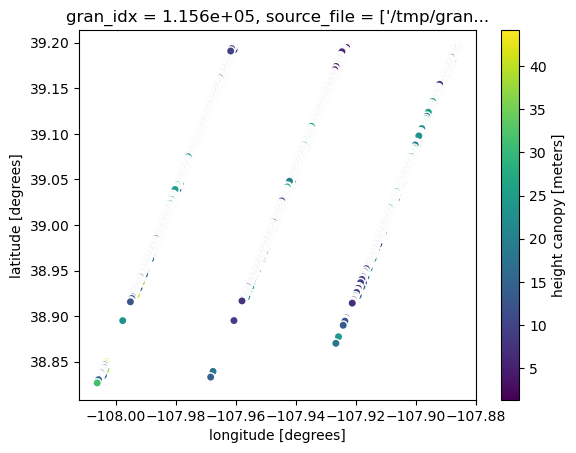

In [11]:
ds.plot.scatter(x="longitude", y="latitude", hue="h_canopy")

### Example 3: Reading a granule with h5py?

In [12]:
import h5py
import numpy as np

In [13]:
f = h5py.File("/tmp/grandmesa_ATL08/processed_ATL08_20191211143520_11560506_006_01.h5", mode='r')

In [14]:
f["/"].keys()

<KeysViewHDF5 ['METADATA', 'ancillary_data', 'ds_geosegments', 'ds_metrics', 'ds_surf_type', 'gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r', 'orbit_info', 'quality_assessment']>

In [15]:
h_canopy = np.array(f["/gt1l/land_segments/canopy/h_canopy"])

In [16]:
h_canopy

array([6.82592773e+00, 8.89868164e+00, 5.43261719e+00, 4.63061523e+00,
       4.54296875e+00, 5.24804688e+00, 4.41186523e+00, 3.89916992e+00,
       9.48120117e+00, 1.07646484e+01, 2.37392578e+01, 1.00693359e+01,
       3.86791992e+00, 1.35986328e+00, 6.63916016e+00, 6.70996094e+00,
       6.27221680e+00, 3.40282347e+38, 5.68359375e+00, 3.40282347e+38,
       1.24887695e+01, 8.06347656e+00, 7.88720703e+00, 3.40747070e+00,
       3.18945312e+00, 2.81152344e+00, 9.56201172e+00, 1.50603027e+01,
       7.54663086e+00, 1.22834473e+01, 9.54809570e+00, 4.61621094e+00,
       3.53637695e+00, 3.76904297e+00, 7.18701172e+00, 1.60043945e+01,
       1.96469727e+01, 3.40282347e+38, 2.13913574e+01, 1.94482422e+01,
       1.48708496e+01, 1.69958496e+01, 1.52304688e+01, 1.79970703e+01,
       1.14118652e+01, 9.28051758e+00, 7.92846680e+00, 1.42802734e+01,
       1.34736328e+01, 3.66406250e+00, 3.72558594e+00, 1.34113770e+01,
       1.81997070e+01, 6.85571289e+00, 7.87841797e+00, 2.78906250e+00,
      

## Part 2: SlideRule

SlideRule is a collaborative effort between NASA Goddard Space Flight Center (GSFC) and the University of Washington, funded by the ICESat-2 program. It provides on-demand science data processing service for ICESat-2 and GEDI data that runs on Amazon Web Services (AWS) and responds to REST-like API calls to process and return science results. This _science-data-as-a-service_ model is a new way for researchers to work and analyze data, enabling them to have low-latency access to custom-generated, high-level data products.

SlideRule users provide specific parameters at the time of the request to compute products that fit their science needs. SlideRule then uses cloud-optimized versions of computational algorithms and a scalable cluster of EC2 instances to process data efficiently. All data is then returned to the user as a `geopandas` GeoDataFrame.

![SlideRule Overview](sliderule_overview_medium.png)

### For more information
***Website***: https://slideruleearth.io  
***Documentation***: https://slideruleearth.io/web/rtd/  
***GitHub***: https://github.com/SlideRuleEarth/sliderule  
***Examples***: https://github.com/SlideRuleEarth/sliderule-python  
***Contact***: support@mail.slideruleearth.io

In [17]:
# To use the latest version of the sliderule client, run this cell.
# It will install the sliderule Python client into your current conda environment.
# You will then need to restart your kernel to have the changes take effect.
%pip install --quiet "sliderule>=4.6"

Note: you may need to restart the kernel to use updated packages.


### Example 1: Just Get Me Some Data

In [18]:
# (1) Import the client
from sliderule import sliderule, icesat2

In [19]:
# (2) Initialize the client
sliderule.init("slideruleearth.io");

In [20]:
# (3) Define an area of interest
region = sliderule.toregion("grandmesa.geojson");

In [21]:
# (4) Specify the processing parameters
parms = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "len": 20.0,
    "res": 100.0
}

In [22]:
# (5) Make the processing request
gdf = icesat2.atl06p(parms)

#### Display the results

In [23]:
gdf

,region,h_sigma,rms_misfit,spot,pflags,rgt,y_atc,w_surface_window_final,gt,x_atc,h_mean,segment_id,dh_fit_dx,cycle,n_fit_photons,geometry
time,,,,,,,,,,,,,,,,
2018-10-16 10:49:21.763047168,6,0.059213,0.414242,3,0,272,41194.648438,3.146032e+00,40,15710061.0,1797.827692,784344,0.121020,1,49,POINT (-108.09813 39.15732)
2018-10-16 10:49:21.773934080,6,0.171685,0.679926,6,0,272,44567.667969,3.917953e+00,10,15712286.0,2205.110892,784455,0.151762,1,17,POINT (-108.06191 39.13431)
2018-10-16 10:49:21.893560064,6,0.530147,1.702927,6,0,272,44545.421875,1.265432e+01,10,15713088.0,2260.114661,784495,0.182269,1,11,POINT (-108.0631 39.12714)
2018-10-16 10:49:22.009937920,6,0.035914,0.287156,1,0,272,37942.792969,1.717312e+01,60,15711985.0,1813.438733,784440,0.059123,1,64,POINT (-108.13779 39.14302)
2018-10-16 10:49:22.116894976,6,0.000000,0.000000,6,1,272,44486.722656,3.000000e+01,10,15714591.0,2549.139896,784570,-0.791383,1,23,POINT (-108.06554 39.11371)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-05 21:42:08.529739776,2,6.008234,308.324646,1,0,737,-1859.211670,3.588987e+20,10,4352867.5,1948.284281,217054,2.667867,23,2689,POINT (-108.09843 39.12156)
2024-05-05 21:42:08.594035200,2,5.008744,204.956665,4,0,737,1433.140137,3.588987e+20,40,4355633.5,1780.562661,217192,-0.860279,23,1675,POINT (-108.13939 39.14353)
2024-05-05 21:42:08.608098560,2,0.000000,0.000000,4,1,737,1433.046631,1.914062e+01,40,4355734.0,1777.159349,217197,-0.750229,23,1698,POINT (-108.1395 39.14443)


#### Plot the results

In [24]:
import matplotlib.pyplot as plt

In [25]:
region_lon = [e["lon"] for e in region["poly"]]
region_lat = [e["lat"] for e in region["poly"]]

In [26]:
f, ax = plt.subplots()
ax.set_title("ATL06-SR Points")
ax.set_aspect('equal')
gdf.plot(ax=ax, column='h_mean', cmap='inferno', s=0.1)
ax.plot(region_lon, region_lat, linewidth=1, color='g');

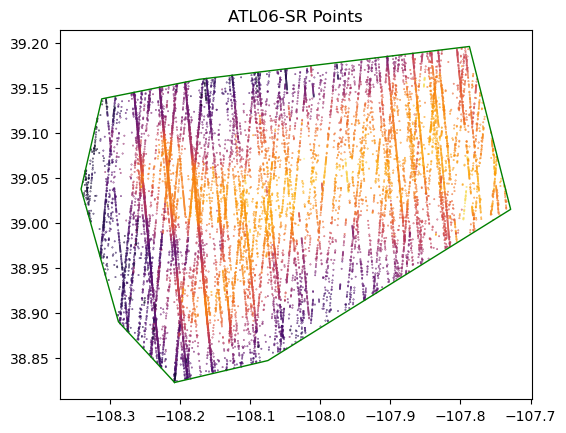

In [27]:
plt.show()

#### Explanation of what happened

#### (1) Import the client

```python
from sliderule import sliderule, icesat2
```

The SlideRule Python client is broken up into different modules:
* `sliderule`: core general functionality
* `icesat2`: ICESat-2 on-demand, subsetting, raster sampling products
* `gedi`: GEDI subsetting, and raster sampling products
* `h5`: direct HDF5 data access
* `earthdata`: CMR, CMR-STAC, TNM helper functions _(use `earthaccess` instead)_
* `io`: reading and writing results to/from local files
* `ipysliderule`: toolbox for building SlideRule interfaces in a Jupyter notebook

#### (2) Initialize the client

```python
sliderule.init("slideruleearth.io");
```

Configure the client settings:
* `url`: address of sliderule service (default = "slideruleearth.io")
* `verbose`: display messages from server (default = False)
* `loglevel`: criticality of log messages to display (default = logging.INFO)
* `organization`: selection of cluster, used for private clusters (default = "sliderule")
* `desired_nodes`: number of nodes to run in a private cluster (default = None)
* `time_to_live`: how long to deploy a private cluster (default = 60 minutes)
* `bypass_dns`: query the provisioning system for IP address and don't use DNS lookup hostname (default = False)
* `plugins`: check if plugin is present (default = [])
* `trust_env`: use netrc file for authentication (default = False)
* `log_handler`: attach handler to client logging (default = None)
* `rethrow`: immediately rethrow any caught exception inside of the client (default = None)

#### (3) Define an area of interest

```python
region = sliderule.toregion("grandmesa.geojson");
```

SlideRule uses an area of interest for determining which dataset resources to process and to then subset those resources to provide data only inside the area of interest.  The `sliderule.toregion` function converts multiple input types into a format understood by SlideRule.  The inputs types supported are: geojson, shapefile, GeoDataFrame, list of coordinates, and a dictionary of coordinates.

The resources (e.g. granules) to process can always be supplied in any of the processing APIs. But if they are not supplied (which is typical), then to determine which resources to process, the SlideRule server-side code uses the area of interest to make requests to NASA's Common Metadata Repository (CMR) legacy and STAC interfaces, along with USGS's The National Map interface. The server code automatically determines which interfaces should be queried and the parameters of the query needed for properly filtering results. 

In rare cases when the area of interest is very complex (e.g. a bunch of islands, or an extremely high vertice-count polygon), then the user can request the server to rasterize the area of interest and use it as a mask for determining which data to process.  See https://slideruleearth.io/web/rtd/user_guide/SlideRule.html#geojson for more details.

#### (4) Specify the processing parameters

```python
parms = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "len": 20.0,
    "res": 100.0
}
```

There is a multitude of processing parameters that are available to each API.  The ones used here are:
* `poly`: area of interest
* `srt`: surface reference type; if set to -1 (or icesat2.DYNAMIC), then all surface types are used
* `len`: length of the extent (or variable-length segment) of along-track photon clouds to use in processing each posting
* `res`: the step size between postings

See user's guide for additional parameters: https://slideruleearth.io/web/rtd/index.html

#### (5) Make the processing request

```python
gdf = icesat2.atl06p(parms)
```

Under-the-hood this makes an HTTP request to the SlideRule service running in AWS to perform the ATL06 surface-finding algorithm on ATL03 photons to produce an elevation, and then collects the results into a pandas GeoDataFrame.

The different ICESat-2 APIs available are:
* `atl03sp`: subset and filter ATL03 photons; provide custom YAPC and ATL08 classifications
* `atl03v`: fast segment level subsetting of ATL03 photons
* `atl06s`: subset the ATL06 land elevation product
* `atl06p`: dynamically generate ATL06 surface elevation product
* `atl08p`: dynamically generate the ATL08 vegetation density product (PhoREAL)
* `atl13p`: subset the ATL13 coastal water product

### Example 2: Sample GEDI Elevation Product at ICESat-2 Dynamically Generated Postings

In [28]:
from sliderule import sliderule, icesat2, gedi

In [29]:
sliderule.init("slideruleearth.io", verbose=True);

Setting URL to slideruleearth.io
Login status to slideruleearth.io/sliderule: failure


In [30]:
parms = {
    "poly": sliderule.toregion('grandmesa.geojson')['poly'],
    "t0": '2019-11-14T00:00:00Z',
    "t1": '2019-11-15T00:00:00Z',
    "srt": icesat2.SRT_LAND,
    "len": 100,
    "res": 100,
    "pass_invalid": False, 
    "atl08_class": ["atl08_ground", "atl08_canopy", "atl08_top_of_canopy"],
    "atl08_fields": ["h_dif_ref"],
    "phoreal": {"binsize": 1.0, "geoloc": "center", "use_abs_h": False, "send_waveform": False},
    "samples": {"gedi": {"asset": "gedil3-elevation"}}
};

In [31]:
atl08 = icesat2.atl08p(parms)

request <AppServer.10153> retrieved 1 resources from CMR
proxy request <AppServer.10153> querying resources for gedi
proxy request <AppServer.10153> returned 0 resources for gedi
Starting proxy for atl08 to process 1 resource(s) with 1 thread(s)
request <AppServer.10171> processing initialized on ATL03_20191114034331_07370502_006_01.h5 ...
Successfully completed processing resource [1 out of 1]: ATL03_20191114034331_07370502_006_01.h5


In [32]:
atl08

,gt,h_min_canopy,rgt,veg_ph_count,landcover,x_atc,h_mean_canopy,segment_id,h_te_median,canopy_h_metrics,...,gnd_ph_count,h_max_canopy,cycle,canopy_openness,geometry,h_dif_ref,gedi.value,gedi.file_id,gedi.flags,gedi.time
time,,,,,,,,,,,,,,,,,,,,,
2019-11-14 03:46:36.935118336,10,0.501465,737,27,30,-6.882999e+10,1.156670,215507,1958.305542,"(1.479736328125, 1.479736328125, 1.47973632812...",...,75,2.261719,5,0.443189,POINT (-108.12262 38.83912),0.963623,1777.066040,0,0,1.326586e+12
2019-11-14 03:46:36.949218304,10,0.515503,737,59,30,-6.882593e+10,1.304013,215512,1964.416748,"(1.4913330078125, 1.4913330078125, 1.491333007...",...,54,3.137817,5,0.636816,POINT (-108.12272 38.84002),-3.216064,1925.270142,0,0,1.326586e+12
2019-11-14 03:46:36.963318272,10,0.515259,737,54,30,-6.882186e+10,1.834195,215517,1976.178833,"(1.5015869140625, 1.5015869140625, 1.501586914...",...,49,4.442627,5,0.892432,POINT (-108.12283 38.84092),-5.043213,1925.270142,0,0,1.326586e+12
2019-11-14 03:46:36.977417984,10,0.804443,737,68,30,-6.881773e+10,2.465483,215522,1991.423218,"(1.7940673828125, 1.7940673828125, 1.794067382...",...,35,6.167480,5,1.023235,POINT (-108.12295 38.84182),2.426270,1925.270142,0,0,1.326586e+12
2019-11-14 03:46:36.980918016,30,0.508423,737,95,20,-6.927786e+10,2.816030,215529,1822.414673,"(1.5048828125, 1.5048828125, 1.5048828125, 1.5...",...,19,7.769043,5,1.389679,POINT (-108.08651 38.84583),5.912720,1779.992554,0,0,1.326586e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-14 03:46:42.283918336,60,0.520142,737,38,40,-6.851285e+10,2.928200,217296,1718.457764,"(1.51220703125, 1.51220703125, 1.51220703125, ...",...,310,7.713501,5,2.058075,POINT (-108.08783 39.16624),-0.977173,1781.542358,0,0,1.326586e+12
2019-11-14 03:46:42.293068288,20,0.504028,737,130,30,-6.805046e+10,3.273977,217288,1786.887939,"(1.5029296875, 1.5029296875, 1.5029296875, 1.5...",...,192,8.225342,5,2.291607,POINT (-108.16125 39.1593),-3.731567,1797.069336,0,0,1.326586e+12
2019-11-14 03:46:42.293818368,40,0.000000,737,0,40,-6.828026e+10,NaN,217294,1709.912354,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,272,0.000000,5,NaN,POINT (-108.12461 39.16313),-0.086914,1720.139282,0,0,1.326586e+12


#### Plot the results

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
plt.figure(figsize=[8,6])

d0=np.min(atl08['x_atc'])

plt.plot(atl08['x_atc']-d0, atl08['h_te_median'], 'o',  markersize=1, color='green', label='h_mean_canopy')
plt.plot(atl08['x_atc']-d0, atl08['gedi.value'], 'o',  markersize=1, color='gray', label='gedi elevation')
hl=plt.legend(loc=3, frameon=False, markerscale=5)

plt.gca().set_ylim([1500, 3500])

(1500.0, 3500.0)

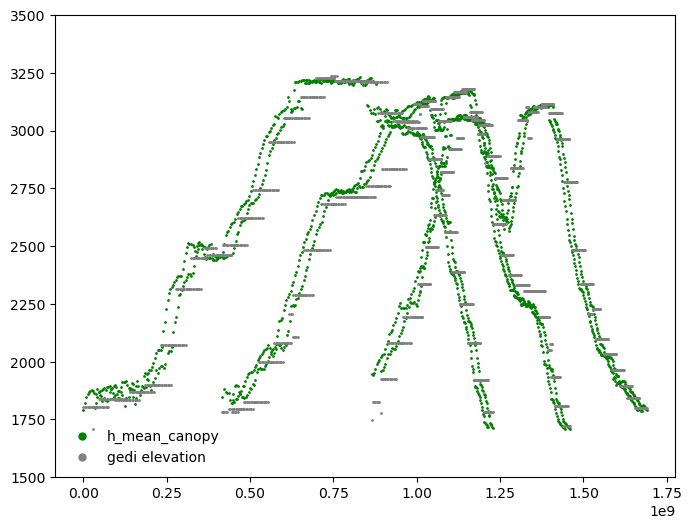

In [35]:
plt.show()

#### Explanation of what's new

* The on-demand ATL08 product (different than the ICESat-2 Standard Data Product) was generated and streamed back to the user.  The ATL08 on-demand product uses University of Texas at Austin's PhoREAL algorithm which was integrated into SlideRule to generate customizable vegetation metrics using ATL03 photon data.

* A time range was specified in the request limiting the results to data collected only between the start and stop times supplied.

* The `"atl08_class"` parameter specified that only photons in ATL03 that were classified as `"atl08_ground"`, `"atl08_canopy"`, or `"atl08_top_of_canopy"` in the ATL08 standard data product are to be supplied to the PhoREAL algorithm and used in the results.

* The `"atl08_fields"` parameter specifies that the  `"h_dif_ref"` variable from the ATL08 standard data product is to be associated with each result returned by SlideRule.  SlideRule attempts to find the value of the variable closest in time to the dynamically generated result.

* The `"phoreal"` parameter provides the processing parameters for the PhoREAL algorithm.
  
* The `"samples"` parameter provides a list of raster datasets that SlideRule should sample at each generated result.  So for each 100m segment that PhoREAL processes, the server-side code will also sample the `gedil3-elevation` product at the latitude and longitude of that segment and return the value with the results.

For a list of raster datasets that are available to sample in SlideRule, see: https://slideruleearth.io/web/rtd/user_guide/GeoRaster.html#asset-directory

### Example 3: Produce GeoParquet of Coastal Photons

In [36]:
from sliderule import sliderule, icesat2
import geopandas as gpd

In [37]:
sliderule.init(verbose=True)

Setting URL to slideruleearth.io
Login status to slideruleearth.io/sliderule: failure


True

In [38]:
region = sliderule.toregion("bathy.geojson");

In [39]:
# ATL03 subsetting request parameters
parms = {
    "poly": region['poly'],
    "srt": icesat2.SRT_DYNAMIC,
    "len": 100,
    "res": 100,
    "pass_invalid": True,
    "output": {
        "asset":"sliderule-stage",
        "format": "parquet",
        "as_geo": True,
        "open_on_complete": False
    }    
}

In [40]:
atl03_url = icesat2.atl03sp(parms, resources=['ATL03_20230213042035_08341807_006_02.h5'])

Starting proxy for atl03s to process 1 resource(s) with 1 thread(s)
request <AppServer.10175> processing initialized on ATL03_20230213042035_08341807_006_02.h5 ...
request <AppServer.10175> processing of ATL03_20230213042035_08341807_006_02.h5 complete (366784/0/0)
Initiated upload of results to S3, bucket = sliderule-public, key = sliderule.00000015394A5FCC.geoparquet
Upload to S3 completed, bucket = sliderule-public, key = sliderule.00000015394A5FCC.geoparquet, size = 10133778


In [41]:
atl03_url

's3://sliderule-public/sliderule.00000015394A5FCC.geoparquet'

In [42]:
# Recent issues with pandas and geopandas have made direct reads temperamental
# atl03 = gpd.pd.read_parquet(atl03_url)

import boto3
atl03_url_tokens = atl03_url.split('/')
s3_client = boto3.client('s3')
s3_client.download_file(atl03_url_tokens[2], atl03_url_tokens[3], "/tmp/" + atl03_url_tokens[3])

atl03 = gpd.read_parquet("/tmp/" + atl03_url_tokens[3])

In [43]:
atl03.keys()

Index(['extent_id', 'x_atc', 'landcover', 'y_atc', 'atl03_cnf', 'atl08_class',
       'snowcover', 'quality_ph', 'yapc_score', 'relief', 'height', 'cycle',
       'pair', 'sc_orient', 'rgt', 'track', 'background_rate', 'segment_id',
       'segment_dist', 'solar_elevation', 'region', 'geometry'],
      dtype='object')

#### Plot the results

In [44]:
import matplotlib.pyplot as plt
import numpy as pd

In [45]:
df = atl03
df = df[df["pair"] == icesat2.LEFT_PAIR]
df = df[df["track"] == 3]
plt.figure(figsize=[8,6])
plt.plot(df['x_atc']+df['segment_dist'], df['height'], 'o',  markersize=1, color='blue')

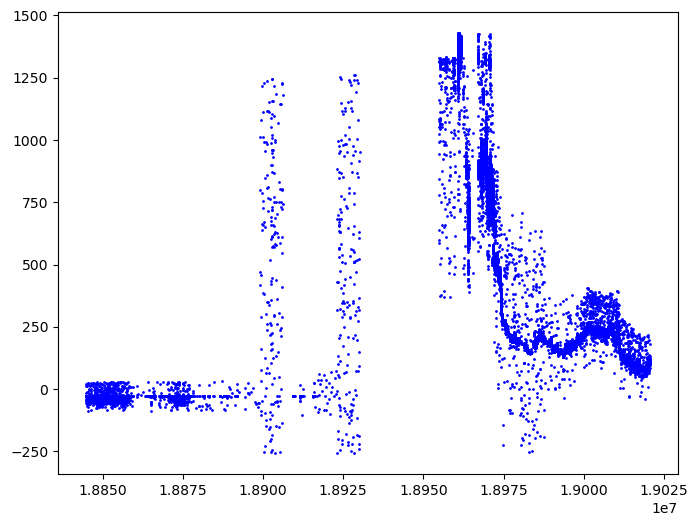

In [46]:
plt.show()

## Part 3: H5Coro - The HDF5 Cloud-Optimized Read-Only Python Package

`h5coro` is a pure Python implementation of a subset of the HDF5 specification that has been optimized for reading data out of S3. 

The project has its roots in SlideRule, where a new C++ implementation of the HDF5 specification was developed for performant read access to Earth science datasets stored in AWS S3. Over time, user's of SlideRule began requesting the ability to performantly read HDF5 and NetCDF files out of S3 from their own Python scripts. The result is `h5coro`: the re-implementation in Python of the core HDF5 reading logic that exists in SlideRule. Since then, `h5coro` has become its own project, which will continue to grow and diverge in functionality from its parent implementation.

`h5coro` is optimized for reading HDF5 data in high-latency high-throughput environments. It accomplishes this through a few key design decisions:

* __All reads are concurrent.__ Each dataset and/or attribute read by h5coro is performed in its own thread.
* __Intelligent range gets__ are used to read as many dataset chunks as possible in each read operation. This drastically reduces the number of HTTP requests to S3 and means there is no longer a need to re-chunk the data (it actually works better on smaller chunk sizes due to the granularity of the request).
* __Block caching__ is used to minimize the number of GET requests made to S3. S3 has a large first-byte latency (we've measured it at ~60ms on our systems), which means there is a large penalty for each read operation performed. h5coro performs all reads to S3 as large block reads and then maintains data in a local cache for access to smaller amounts of data within those blocks.
* The system is __serverless__ and does not depend on any external services to read the data. This means it scales naturally as the user application scales, and it reduces overall system complexity.
* __No metadata repository is needed.__ The structure of the file are cached as they are read so that successive reads to other datasets in the same file will not have to re-read and re-build the directory structure of the file.

### For more information:
***GitHub***: https://github.com/SlideRuleEarth/h5coro

In [47]:
# To use the latest version of the sliderule client, run this cell.
# It will install the sliderule Python client into your current conda environment.
# You will then need to restart your kernel to have the changes take effect.
%pip install --quiet "h5coro>=0.0.7"

Note: you may need to restart the kernel to use updated packages.


### Example 1: Read ATL03 variables for bathymetry

In [48]:
# (1) Import modules
from h5coro import h5coro, s3driver
import earthaccess

In [49]:
# (2) Authenticate to Earth Data Login
auth = earthaccess.login()
s3_creds = auth.get_s3_credentials(daac="NSIDC")

In [50]:
# (3) Initialize h5coro object
granule = "nsidc-cumulus-prod-protected/ATLAS/ATL03/006/2023/02/13/ATL03_20230213042035_08341807_006_02.h5"
h5obj = h5coro.H5Coro(granule, s3driver.S3Driver, errorChecking=True, verbose=False, credentials=s3_creds, multiProcess=False)

In [51]:
# (4) Read the data
variables = ["/gt3l/heights/h_ph", "/gt3l/heights/dist_ph_along", "/gt3l/geolocation/segment_dist_x", "/gt3l/geolocation/segment_ph_cnt"]
promise = h5obj.readDatasets(variables, block=True, enableAttributes=False)
for variable in promise:
    print(f'{variable}: {promise[variable][0:10]}')

gt3l/heights/h_ph: [-47.941536 -51.9231   -48.09843  -47.873924 -48.12945  -48.118694
 -48.308052 -48.208042 -47.802708 -48.004234]
gt3l/heights/dist_ph_along: [0.7542868  0.76623714 1.4717534  2.187351   2.1880984  2.9048157
 2.905563   3.621905   4.337497   5.0545855 ]
gt3l/geolocation/segment_dist_x: [17068770.48934802 17068790.54479094 17068810.60023396 17068830.65567708
 17068850.7111203  17068870.76656362 17068890.82200704 17068910.87745056
 17068930.93289417 17068950.98833789]
gt3l/geolocation/segment_ph_cnt: [37 25 44 39 22 40 37 42 35 38]


#### Explanation of what happened

#### (1) Import the necessary packages to use `h5coro`. 

`h5coro` relies on `earthaccess` for authenticating to Earth Data Login.  The modules a user might want to import are:
* `s3driver`: for reading data out of an s3 bucket
* `filedriver`: for reading data out of a local file
* `webdriver`: for reading data diretly over https (including objects in s3 buckets)
* `logger`: for configuring the logging in h5coro

#### (2) Authenticate to Earth Data Login

In my system I have a `.netrc` file setup with the following line:
```
machine urs.earthdata.nasa.gov login <my_user_name> password <my_password>
```

#### (3) Create an h5coro object for the granule that you want to read

`h5coro` is object oriented, so all context information associated with the provided granule is stored in the object.  Note that the full path to the granule is needed, including the s3 bucket.

#### (4) Read the data

`h5coro` implements an asynchronous I/O interface, meaning that when the `readDatasets` function is called, it makes a read "request" in the background and returns immediately back to the caller.  The caller receives something called a "promise" (or "future") which is a promise that data will be there in the future at some point.  You then can do other things while you wait, and when you finally need the data, you have to "block" or wait for it to be available.

In this example, I set the "block" parameter to True so that it would wait right away.  But in more sophisticated examples, other work could have been done by the notebook while waiting for the results of the read.